<a href="https://colab.research.google.com/github/jhchang/DFDC/blob/main/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
from glob import glob
import pandas as pd

csvs = glob("/content/drive/MyDrive/cs274/resultsL1Unstructured/*.csv")

df = pd.concat([pd.read_csv(csv) for csv in csvs])

In [131]:
df

,Unnamed: 0,pruning_type,num_params,percentage_pruned,accuracy,runtime,num_videos,num_similar_params,total_possible_selected_paramters,new_model_size_mb,percentage_of_size_saved,efficientnet._conv_stem_weight,efficientnet._bn0_bias,efficientnet._bn0_weight,efficientnet._blocks.0._depthwise_conv_weight,efficientnet._blocks.0._bn1_weight,efficientnet._blocks.0._bn1_bias,efficientnet._blocks.0._se_reduce_bias,efficientnet._blocks.0._se_reduce_weight,efficientnet._blocks.0._se_expand_weight,efficientnet._blocks.0._se_expand_bias,efficientnet._blocks.0._project_conv_weight,efficientnet._blocks.0._bn2_bias,efficientnet._blocks.0._bn2_weight,efficientnet._blocks.1._depthwise_conv_weight,efficientnet._blocks.1._bn1_weight,efficientnet._blocks.1._bn1_bias,efficientnet._blocks.1._se_reduce_bias,efficientnet._blocks.1._se_reduce_weight,efficientnet._blocks.1._se_expand_weight,efficientnet._blocks.1._se_expand_bias,efficientnet._blocks.1._project_conv_weight,efficientnet._blocks.1._bn2_weight,efficientnet._blocks.1._bn2_bias,efficientnet._blocks.2._expand_conv_weight,efficientnet._blocks.2._bn0_weight,efficientnet._blocks.2._bn0_bias,efficientnet._blocks.2._depthwise_conv_weight,efficientnet._blocks.2._bn1_weight,efficientnet._blocks.2._bn1_bias,...,efficientnet._blocks.29._se_reduce_bias,efficientnet._blocks.29._se_reduce_weight,efficientnet._blocks.29._se_expand_weight,efficientnet._blocks.29._se_expand_bias,efficientnet._blocks.29._project_conv_weight,efficientnet._blocks.29._bn2_weight,efficientnet._blocks.29._bn2_bias,efficientnet._blocks.30._expand_conv_weight,efficientnet._blocks.30._bn0_weight,efficientnet._blocks.30._bn0_bias,efficientnet._blocks.30._depthwise_conv_weight,efficientnet._blocks.30._bn1_bias,efficientnet._blocks.30._bn1_weight,efficientnet._blocks.30._se_reduce_bias,efficientnet._blocks.30._se_reduce_weight,efficientnet._blocks.30._se_expand_bias,efficientnet._blocks.30._se_expand_weight,efficientnet._blocks.30._project_conv_weight,efficientnet._blocks.30._bn2_bias,efficientnet._blocks.30._bn2_weight,efficientnet._blocks.31._expand_conv_weight,efficientnet._blocks.31._bn0_bias,efficientnet._blocks.31._bn0_weight,efficientnet._blocks.31._depthwise_conv_weight,efficientnet._blocks.31._bn1_weight,efficientnet._blocks.31._bn1_bias,efficientnet._blocks.31._se_reduce_weight,efficientnet._blocks.31._se_reduce_bias,efficientnet._blocks.31._se_expand_bias,efficientnet._blocks.31._se_expand_weight,efficientnet._blocks.31._project_conv_weight,efficientnet._blocks.31._bn2_weight,efficientnet._blocks.31._bn2_bias,efficientnet._conv_head_weight,efficientnet._bn1_bias,efficientnet._bn1_weight,efficientnet.attconv_bias,efficientnet.attconv_weight,classifier_bias,classifier_weight
0,0,global_L1unstructured,0,0.0,0.90,10.333381,100,17550466,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,global_L1unstructured,420,0.8,0.20,10.513516,100,3510105,17550466.0,121.370408,0.799999,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2,global_L1unstructured,420,0.7,0.20,10.516868,100,5265152,17550466.0,182.055422,0.699999,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,3,global_L1unstructured,420,0.6,0.20,10.513238,100,7020198,17550466.0,242.740401,0.599999,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.

In [132]:
df['total_params_pruned'] = df['total_possible_selected_paramters'] - df['num_similar_params']

In [133]:
df[0:10]

,Unnamed: 0,pruning_type,num_params,percentage_pruned,accuracy,runtime,num_videos,num_similar_params,total_possible_selected_paramters,new_model_size_mb,percentage_of_size_saved,efficientnet._conv_stem_weight,efficientnet._bn0_bias,efficientnet._bn0_weight,efficientnet._blocks.0._depthwise_conv_weight,efficientnet._blocks.0._bn1_weight,efficientnet._blocks.0._bn1_bias,efficientnet._blocks.0._se_reduce_bias,efficientnet._blocks.0._se_reduce_weight,efficientnet._blocks.0._se_expand_weight,efficientnet._blocks.0._se_expand_bias,efficientnet._blocks.0._project_conv_weight,efficientnet._blocks.0._bn2_bias,efficientnet._blocks.0._bn2_weight,efficientnet._blocks.1._depthwise_conv_weight,efficientnet._blocks.1._bn1_weight,efficientnet._blocks.1._bn1_bias,efficientnet._blocks.1._se_reduce_bias,efficientnet._blocks.1._se_reduce_weight,efficientnet._blocks.1._se_expand_weight,efficientnet._blocks.1._se_expand_bias,efficientnet._blocks.1._project_conv_weight,efficientnet._blocks.1._bn2_weight,efficientnet._blocks.1._bn2_bias,efficientnet._blocks.2._expand_conv_weight,efficientnet._blocks.2._bn0_weight,efficientnet._blocks.2._bn0_bias,efficientnet._blocks.2._depthwise_conv_weight,efficientnet._blocks.2._bn1_weight,efficientnet._blocks.2._bn1_bias,...,efficientnet._blocks.29._se_reduce_weight,efficientnet._blocks.29._se_expand_weight,efficientnet._blocks.29._se_expand_bias,efficientnet._blocks.29._project_conv_weight,efficientnet._blocks.29._bn2_weight,efficientnet._blocks.29._bn2_bias,efficientnet._blocks.30._expand_conv_weight,efficientnet._blocks.30._bn0_weight,efficientnet._blocks.30._bn0_bias,efficientnet._blocks.30._depthwise_conv_weight,efficientnet._blocks.30._bn1_bias,efficientnet._blocks.30._bn1_weight,efficientnet._blocks.30._se_reduce_bias,efficientnet._blocks.30._se_reduce_weight,efficientnet._blocks.30._se_expand_bias,efficientnet._blocks.30._se_expand_weight,efficientnet._blocks.30._project_conv_weight,efficientnet._blocks.30._bn2_bias,efficientnet._blocks.30._bn2_weight,efficientnet._blocks.31._expand_conv_weight,efficientnet._blocks.31._bn0_bias,efficientnet._blocks.31._bn0_weight,efficientnet._blocks.31._depthwise_conv_weight,efficientnet._blocks.31._bn1_weight,efficientnet._blocks.31._bn1_bias,efficientnet._blocks.31._se_reduce_weight,efficientnet._blocks.31._se_reduce_bias,efficientnet._blocks.31._se_expand_bias,efficientnet._blocks.31._se_expand_weight,efficientnet._blocks.31._project_conv_weight,efficientnet._blocks.31._bn2_weight,efficientnet._blocks.31._bn2_bias,efficientnet._conv_head_weight,efficientnet._bn1_bias,efficientnet._bn1_weight,efficientnet.attconv_bias,efficientnet.attconv_weight,classifier_bias,classifier_weight,total_params_pruned
0,0,global_L1unstructured,0,0.0,0.90,10.333381,100,17550466,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-17550466.0
1,1,global_L1unstructured,420,0.8,0.20,10.513516,100,3510105,17550466.0,121.370408,0.799999,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,14040361.0
2,2,global_L1unstructured,420,0.7,0.20,10.516868,100,5265152,17550466.0,182.055422,0.699999,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12285314.0
3,3,global_L1unstructured,420,0.6,0.20,10.513238,100,7020198,17550466.0,242.740401,0.599999,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


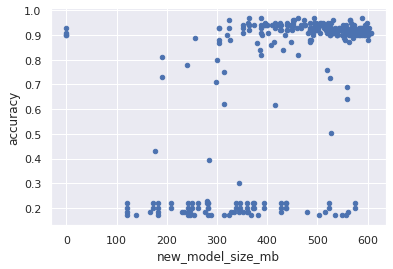

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt = df.plot(x='new_model_size_mb', y='accuracy', kind='scatter')

# df['col_A'].plot(kind='hist', bins=20)
# plt.show()


# fig, ax = plt.subplots(1,2, figsize=(10,10), sharey=True)

# df['col_B'].plot(kind='hist', bins=20, ax=ax[0])
# df.plot(x='col_A', y='col_B', kind='scatter', ax=ax[1])
# plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'Total Number of Parameters Pruned')

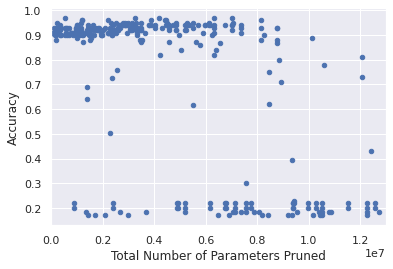

In [154]:
import math

plt = df.plot(x='total_params_pruned', y='accuracy', kind='scatter')
plt.set_xlim([0, 13000000])
plt.set_ylabel('Accuracy')
plt.set_xlabel('Total Number of Parameters Pruned')

### Finding modules that shouldn't be pruned

In [136]:
df_poi = df[(df['total_params_pruned'] < 2000000) & (df['accuracy'] < 0.3)]
print(df_poi.shape)
df_poi = df_poi.fillna(0)
series_sum_columns = df_poi.sum(axis=0)

(5, 432)


In [137]:
series_module_columns = series_sum_columns[11:-1]
series_important_modules = series_module_columns[series_module_columns > 3]
print(series_important_modules)
print()
print(f'important modules: {series_important_modules.keys()}')

efficientnet._blocks.5._bn1_bias                  4
efficientnet._blocks.8._se_expand_weight          4
efficientnet._blocks.9._se_reduce_weight          4
efficientnet._blocks.12._bn2_weight               5
efficientnet._blocks.13._bn0_bias                 4
efficientnet._blocks.17._depthwise_conv_weight    4
efficientnet._blocks.17._se_expand_weight         4
efficientnet._blocks.26._project_conv_weight      4
efficientnet._blocks.29._bn0_weight               4
efficientnet._blocks.29._bn2_weight               4
efficientnet._blocks.30._depthwise_conv_weight    4
classifier_weight                                 5
dtype: object

important modules: Index(['efficientnet._blocks.5._bn1_bias',
       'efficientnet._blocks.8._se_expand_weight',
       'efficientnet._blocks.9._se_reduce_weight',
       'efficientnet._blocks.12._bn2_weight',
       'efficientnet._blocks.13._bn0_bias',
       'efficientnet._blocks.17._depthwise_conv_weight',
       'efficientnet._blocks.17._se_expand_weight'

### Finding modeles that are okay to prune

In [138]:
df_poi_good_prune = df[df['accuracy'] > 0.9]
print(df_poi_good_prune.shape)
df_poi_good_prune = df_poi_good_prune.fillna(0)
series_sum_columns1 = df_poi_good_prune.sum(axis=0)

(173, 432)


In [139]:
series_module_columns1 = series_sum_columns1[11:-1]
series_important_modules1 = series_module_columns1[series_module_columns1 > 95]
print(series_important_modules1)
print()
print(f'important modules: {series_important_modules1.keys()}')

efficientnet._blocks.2._se_expand_bias          101
efficientnet._blocks.3._bn0_weight               98
efficientnet._blocks.6._se_reduce_weight         97
efficientnet._blocks.7._se_expand_weight        100
efficientnet._blocks.8._bn0_bias                 97
efficientnet._blocks.8._bn2_weight              102
efficientnet._blocks.10._expand_conv_weight      97
efficientnet._blocks.13._bn0_weight              98
efficientnet._blocks.14._bn0_bias                97
efficientnet._blocks.14._bn2_weight              96
efficientnet._blocks.19._bn1_bias                99
efficientnet._blocks.19._project_conv_weight     98
efficientnet._blocks.20._bn2_bias                97
efficientnet._blocks.24._se_expand_bias          96
efficientnet._blocks.28._bn0_bias                96
dtype: object

important modules: Index(['efficientnet._blocks.2._se_expand_bias',
       'efficientnet._blocks.3._bn0_weight',
       'efficientnet._blocks.6._se_reduce_weight',
       'efficientnet._blocks.7._se_expand

### random Unstructured

In [145]:
csvs1 = glob("/content/drive/MyDrive/cs274/resultsRandomUnstructured/*.csv")

df1 = pd.concat([pd.read_csv(csv) for csv in csvs1])

In [146]:
df1['total_params_pruned'] = df1['total_possible_selected_paramters'] - df1['num_similar_params']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


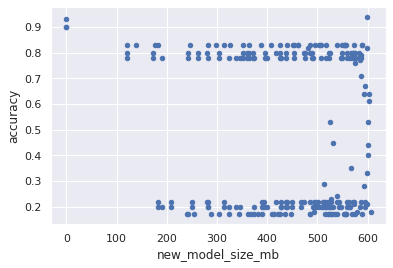

In [149]:
plt = df1.plot(x='new_model_size_mb', y='accuracy', kind='scatter')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'Total Number of Parameters Pruned')

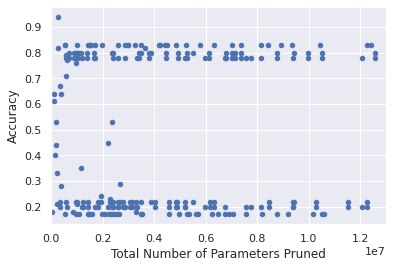

In [151]:
plt = df1.plot(x='total_params_pruned', y='accuracy', kind='scatter')
plt.set_xlim([0, 13000000])
plt.set_ylabel('Accuracy')
plt.set_xlabel('Total Number of Parameters Pruned')


individual batchs comparison

In [ ]:
csvs = glob("/content/drive/MyDrive/cs274/resultsL1Unstructured/05-17-2021_09:49:05-100-200images.csv")

dfc = pd.concat([pd.read_csv(csv) for csv in csvs])
dfc

In [ ]:
dfc['total_params_pruned'] = dfc['total_possible_selected_paramters'] - dfc['num_similar_params']
plt = dfc.plot(x='new_model_size_mb', y='accuracy', kind='scatter')
plt.set_ylabel('Accuracy')
plt.set_xlabel('Size of Pruned Model (MB)')